### Your repository must include:

- At least one dataset (CSV, Excel, etc.).
- Stretch goal: Add a second dataset or API and combine them in a meaningful way. This is optional for the mini project but will be required for the full capstone, so it’s worth trying here if you can.
- Demonstrated data cleaning and wrangling
- Show your use of Pandas tools to inspect, clean, and restructure your data. Don’t start with a pre-cleaned file- your process is the focus.
- Exploratory data analysis (EDA)
- Include summary statistics, reshaped tables, and grouped insights. Handle missing values and fix data types as needed.
- At least three meaningful visualizations
- Use Matplotlib, Seaborn, or Plotly to clearly communicate insights. Include at least one chart that highlights a comparison, pattern, or key finding.
- For each visual, include a markdown cell that explains what story you are trying to tell, and justify your choices of chart, color, shape, etc.
- Explanatory markdown throughout
- Describe your thinking as you go: why you cleaned data a certain way, what you hoped to find, what the visualizations show, etc.
- Use of a virtual environment and requirements.txt file
- Follow the setup instructions in this week's first lesson.
### Your repo must include:

- Your completed notebook
- The data file(s) used (uploaded into the repo, not just linked externally)
- Your requirements.txt file
- a README.md file (see previous lesson)

In [27]:
# miscellaneous container
# FIND AN INFLATION API TO CROSS REFERENCE WITH HOUSING PRICE INCREASES

In [46]:
# imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
# Show all data outputs
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)


In [5]:
# load csv data from mac
top_tier_zhvi_df = pd.read_csv(r'/Users/davidenglish/Code_You_Projects/code_you_data_analytics_project/data/Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_month.csv')
middle_tier_zhvi_df = pd.read_csv(r'/Users/davidenglish/Code_You_Projects/code_you_data_analytics_project/data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv')
bottom_tier_zhvi_df = pd.read_csv(r'/Users/davidenglish/Code_You_Projects/code_you_data_analytics_project/data/Metro_zhvi_uc_sfrcondo_tier_0.0_0.33_sm_sa_month.csv')


In [6]:
# load data from Desktop

In [7]:
middle_tier_zhvi_df.shape

(895, 360)

In [8]:
middle_tier_zhvi_df.describe()

,RegionID,SizeRank,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31
count,895.000000,895.000000,431.000000,432.000000,433.000000,435.000000,437.

In [9]:
middle_tier_zhvi_df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
1996-02-29    float64
1996-03-31    float64
1996-04-30    float64
1996-05-31    float64
1996-06-30    float64
1996-07-31    float64
1996-08-31    float64
1996-09-30    float64
1996-10-31    float64
1996-11-30    float64
1996-12-31    float64
1997-01-31    float64
1997-02-28    float64
1997-03-31    float64
1997-04-30    float64
1997-05-31    float64
1997-06-30    float64
1997-07-31    float64
1997-08-31    float64
1997-09-30    float64
1997-10-31    float64
1997-11-30    float64
1997-12-31    float64
1998-01-31    float64
1998-02-28    float64
1998-03-31    float64
1998-04-30    float64
1998-05-31    float64
1998-06-30    float64
1998-07-31    float64
1998-08-31    float64
1998-09-30    float64
1998-10-31    float64
1998-11-30    float64
1998-12-31    float64
1999-01-31    float64
1999-02-28    float64
1999-03-31    float64
1999-04-30    float64
1999-05-31    float64
1999-06-30

In [15]:
# though there are a lot of na values, especially in older columns, I'm going to keep the NaN values to preserve dataset integrity. I believe we can explain or omit older data as needed if we're severly lacking in a specific area.
middle_tier_zhvi_df.isnull().sum()


RegionID        0
SizeRank        0
RegionName      0
RegionType      0
StateName       1
1996-02-29    464
1996-03-31    463
1996-04-30    462
1996-05-31    460
1996-06-30    458
1996-07-31    457
1996-08-31    456
1996-09-30    455
1996-10-31    454
1996-11-30    454
1996-12-31    451
1997-01-31    450
1997-02-28    442
1997-03-31    442
1997-04-30    442
1997-05-31    440
1997-06-30    439
1997-07-31    438
1997-08-31    437
1997-09-30    437
1997-10-31    437
1997-11-30    436
1997-12-31    435
1998-01-31    434
1998-02-28    433
1998-03-31    433
1998-04-30    433
1998-05-31    427
1998-06-30    424
1998-07-31    426
1998-08-31    426
1998-09-30    422
1998-10-31    423
1998-11-30    422
1998-12-31    422
1999-01-31    425
1999-02-28    419
1999-03-31    418
1999-04-30    416
1999-05-31    415
1999-06-30    413
1999-07-31    411
1999-08-31    407
1999-09-30    405
1999-10-31    404
1999-11-30    403
1999-12-31    402
2000-01-31    401
2000-02-29    397
2000-03-31    397
2000-04-30

In [ ]:
# Check and see if there is only one city per row, or if there might be duplicates. 
# Turns out there's only one city/metro area per row. 
region_name_value_counts = middle_tier_zhvi_df['RegionName'].value_counts()


In [37]:
# Time to Plot a Graph!
# filtering by the city of Louisivlle
louisville_row = middle_tier_zhvi_df[middle_tier_zhvi_df['RegionName'] == 'Louisville, KY']
# Select only data value rows
louisville_data = louisville_row.iloc[:, 6:]


In [38]:
years = louisville_data.columns.to_list()
values = louisville_data.values[0]

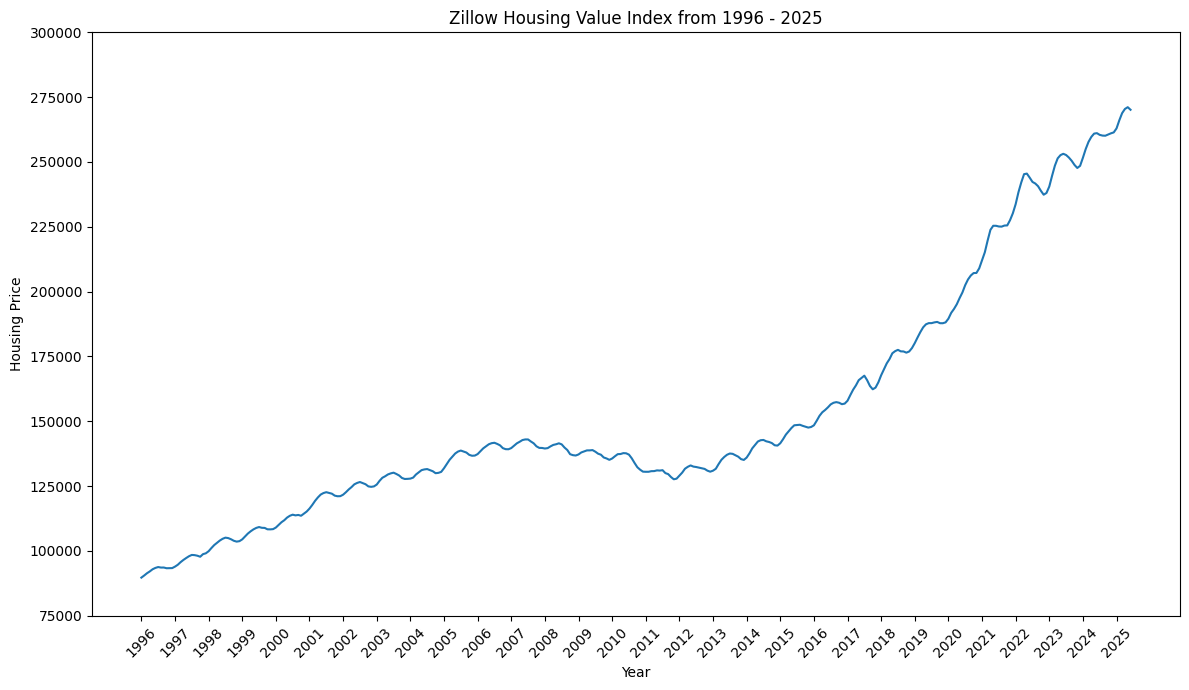

In [55]:
# Plot
plt.figure(figsize=(12,7))
plt.plot(years, values)
plt.title("Zillow Housing Value Index from 1996 - 2025")
plt.ylabel("Housing Price")
plt.xlabel("Year")
plt.ylim(75000, 300000)

plt.gca()
# extracts the first four characters of of the year list
year_format = [year[:4] for year in years]


plt.xticks(years[::12], year_format[::12], rotation=45)
plt.tight_layout()
plt.show()

['1996-03-31',
 '1996-04-30',
 '1996-05-31',
 '1996-06-30',
 '1996-07-31',
 '1996-08-31',
 '1996-09-30',
 '1996-10-31',
 '1996-11-30',
 '1996-12-31',
 '1997-01-31',
 '1997-02-28',
 '1997-03-31',
 '1997-04-30',
 '1997-05-31',
 '1997-06-30',
 '1997-07-31',
 '1997-08-31',
 '1997-09-30',
 '1997-10-31',
 '1997-11-30',
 '1997-12-31',
 '1998-01-31',
 '1998-02-28',
 '1998-03-31',
 '1998-04-30',
 '1998-05-31',
 '1998-06-30',
 '1998-07-31',
 '1998-08-31',
 '1998-09-30',
 '1998-10-31',
 '1998-11-30',
 '1998-12-31',
 '1999-01-31',
 '1999-02-28',
 '1999-03-31',
 '1999-04-30',
 '1999-05-31',
 '1999-06-30',
 '1999-07-31',
 '1999-08-31',
 '1999-09-30',
 '1999-10-31',
 '1999-11-30',
 '1999-12-31',
 '2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-31',
 '2001-08-31',
 '2001-09-